<h3><center>This NoteBook will be mainly used for the capstone project!</center></h3>

<h1><center>Predicting Car accident severity</center></h1>

<h3><center>15 September 2020</center></h3>

## 1. Introduction (Background and Problem / Interest)

Governmental institutions (Sepcialliy MINISTRY OF HEALTH) are trying to enhance their stratigies and plans to be be more a data driven deceisions, therefore we were asked to build a data driven model which should enhance MOH decisions specially regarding Car accidents.
MOH puts much efforts trying to save peoples lifes and decrease the so called fatality accidents due to Car accidents.
Therefore we want to be able to predict the severity of a road accidents under certain conditions like current weather, roads and visibility as tt makes it possible to alert the drivers for the current risks and also to better allocate resources, like police and medical emergency teams, according to the conditions that will make severe accidents more likely to happen in a certain area.
Obviously, governmental agencies including but not limited to Health organizations, Police departments and fire fighters would be very interested and even Car drivers.

## 2. Data (Acquisition - Preparation)

Data Originally obtained from GISWEB and mainly represent Collisions provided by SPD and recorded by Traffic records (Timeframe from 2004 till Present).
The dataset to be used has 38 different Feature, and the target variable will be 'SEVERITYCODE', as it is a measure of the severity of the accident which varies between 1 and 2 (1 represents Property Damage Only Collision and 2 represents Injury Collision).
The dataset needed some preparation to be fit for analysis before modeling.
From the 38 Feature of this dataset, many are not useful for this model and many of the features need to be converted to numerical type, using label encoding which will create new numerical columns.
Missing values was tested for significancy before dropping it from the dataset.
The imbalance of targeted label was solved by dropping labeled data (Rows) from the dataset to reach a balanced dataset.

The provided dataset contains 194,673 entries (rows), with 38 different features (columns). Each entry contains information regarding an accident incident.

## 3. Methodology 

Different EDA was performed to understand the data and the different relations between our target variable and featsures, we have plotted histograms and bar charts (In the notebook below) between different features and the target including the address type of collisions whether alley, intersection or block, road and light condition, number of people and cars in the collission, collison type and junction type.
We have used two models for predicting our target which are Decision Tree and Logestic regression in order to predcit the severity of accident.
differenct evaluation metrics used including LogLoss, F1 score and jaccard similarity score. 
(All analysis performed below)

## 4. Results 

As mentioned in the methodolo
gy section two models were developed and different metrics used to evaluate our models and the results as follows :-

| Model          | Jaccard Similarity Score                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Decision Tree   | 73%       |
| LR       | 70%                                                        |



| Field          | F1 Score                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Decision Tree   | 66%       |
| LR       | 58%                                                        |


| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Decision Tree   | NA       |
| LR       | 57%                                                         |

## 5. Conclusion 

In this study, We analyzed the relationship between Car accidents sevrity and their Junction type, road condition and adress of collision type (alley, block, intersection), this models can be very useful to the relevant insutitutions as they can expect and decrease the severity of accidents through fixing and enhancing the main features in relation to the fatality accidents.

In [1]:
# Importing libraries

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
# Dataset Importing
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
print('Dataset Loaded successfully')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dataset Loaded successfully


In [4]:
df.head(2)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N


### About dataset

This dataset is about Car Accidents Servrity. The __Data-Collisions__ data set includes details of 194K case with servrity of 1 OR 2  (1 represents Property Damage Only Collision and 2 represents Injury Collision):

###### Main Features to be possibly used :-

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| SEVERITYCODE   | (1 represents Property Damage Only Collision and 2 represents Injury Collision)       |
| ADDRTYPE       | Alley / Block / Intersection                                                          |
| ROADCOND       | The condition of the road during the collision                                        |
| LIGHTCOND      | The light conditions during the collision                                             |
| PEDROWNOTGRNT  | Whether or not the pedestrian right of way was not granted. (Y/N)                     |
| SPEEDING      | If speed is factor in the collision (Y/N)                                             |
|PERSONCOUNT |     Total No. of People involved |
|PEDCOUNT| Total No. of Pedestrians involved |
|PEDESTRIANS |  Total No. of bicycles involved|
|VEHCOUNT|Total No. of vehicles involved|
|INCDATE|The date of the incident|
|INCDTTM|The date and time of the incident|
|VEHCOUNT|Total No. of vehicles involved|

In [5]:
df.shape

(194673, 38)

In [6]:
# Coverting to date time object
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df[['INCDATE','INCDTTM']].head()

,INCDATE,INCDTTM
0,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00
1,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00
2,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00
3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00
4,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00


In [7]:
# Checking how many of each class is in our data set
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [8]:
# Installing seaporn
!pip install seaborn

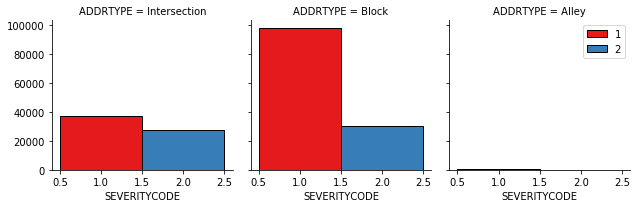

In [52]:
import seaborn as sns

g = sns.FacetGrid(df, col="ADDRTYPE", hue="SEVERITYCODE", palette="Set1", col_wrap=3)
g.map(plt.hist, 'SEVERITYCODE', bins=1, ec="k")

g.axes[-1].legend()
plt.show()

###### Most accidents as we can see with Property damage is in Blocks.

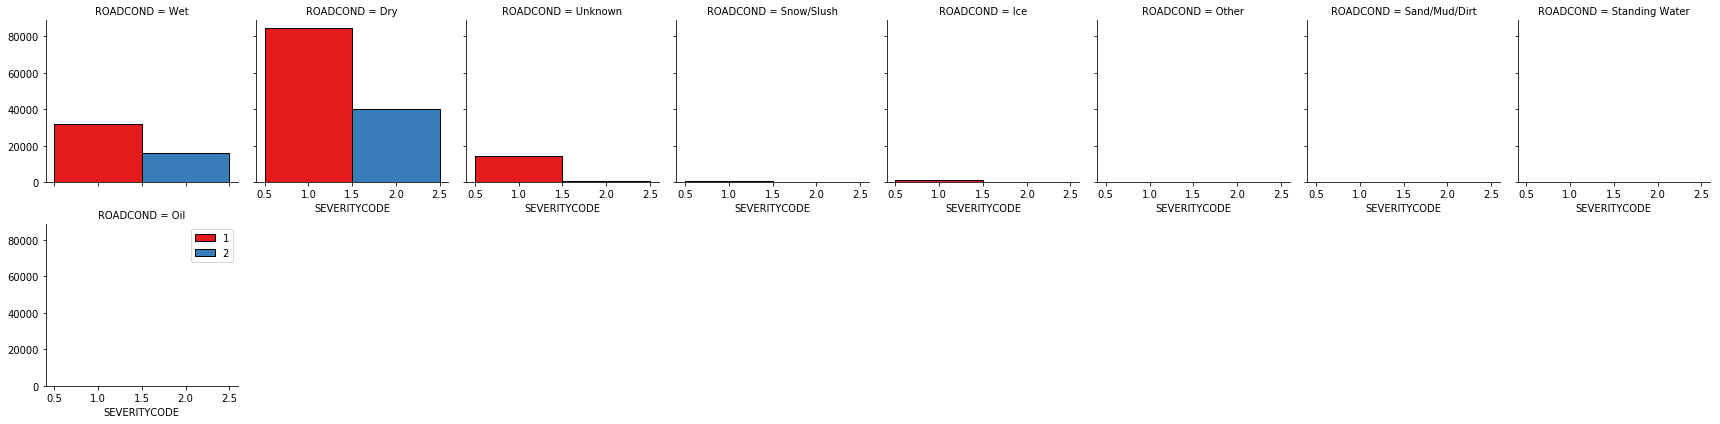

In [10]:
g = sns.FacetGrid(df, col="ROADCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=8)
g.map(plt.hist, 'SEVERITYCODE', bins=1, ec="k")

g.axes[-1].legend()
plt.show()

###### Most accidents as we can see with Property damage is in dry and wet conditions.

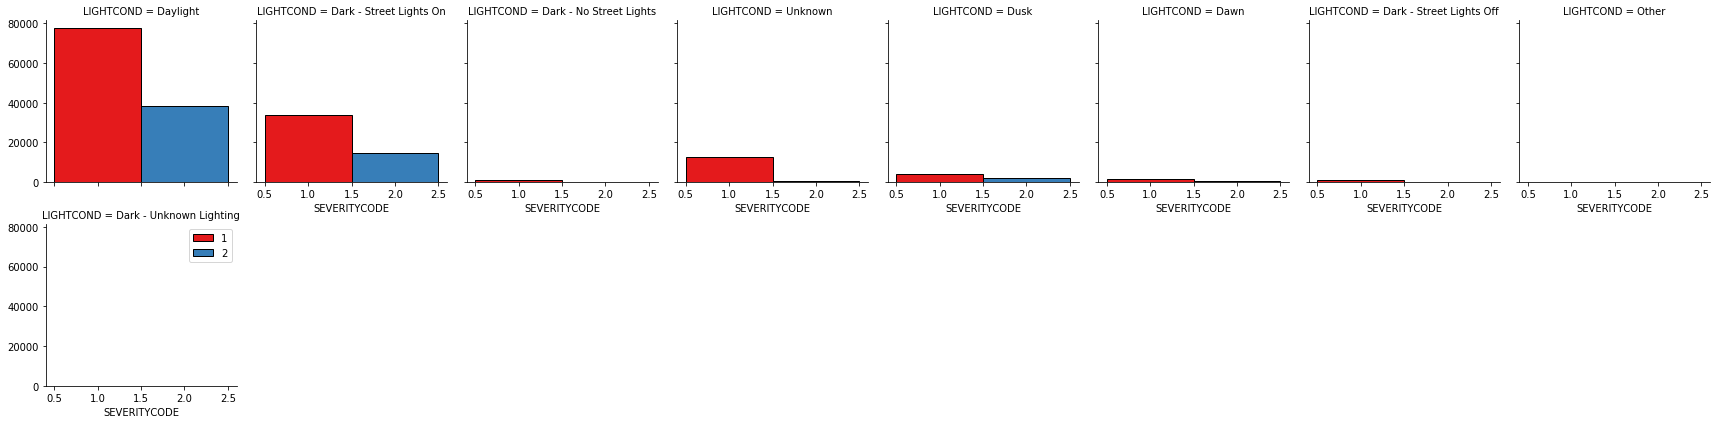

In [11]:
g = sns.FacetGrid(df, col="LIGHTCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=8)
g.map(plt.hist, 'SEVERITYCODE', bins=1, ec="k")

g.axes[-1].legend()
plt.show()

###### Most accidents as we can see with Property damage is in daylight.

In [12]:
#Bar Plot
def bar_plot(data_column, x_label, y_label, title, size=(10,6), rotate=0):
    a = data_column.value_counts()
    codes = a.index
    count = a.values
    plt.figure(figsize=size)
    ax = sns.barplot(x = codes, y=count)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_title(title, fontsize=22)
    plt.xticks(rotation=rotate)
    plt.show()

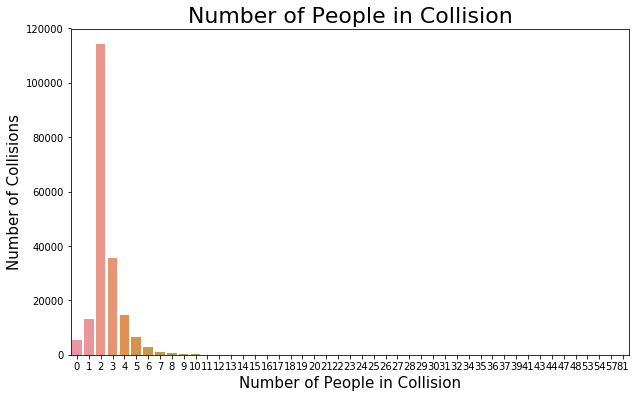

In [13]:
#Number of People per Collision
bar_plot(df['PERSONCOUNT'], 'Number of People in Collision', 'Number of Collisions', 'Number of People in Collision')

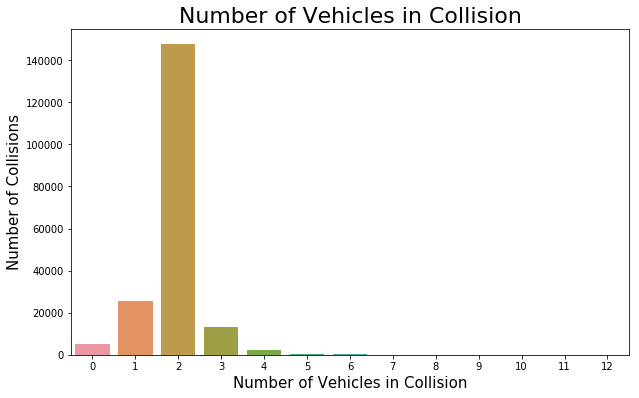

In [14]:
#Bar Plot Number of Vehicles per Collisions 
bar_plot(df['VEHCOUNT'], 'Number of Vehicles in Collision', 'Number of Collisions', 'Number of Vehicles in Collision')

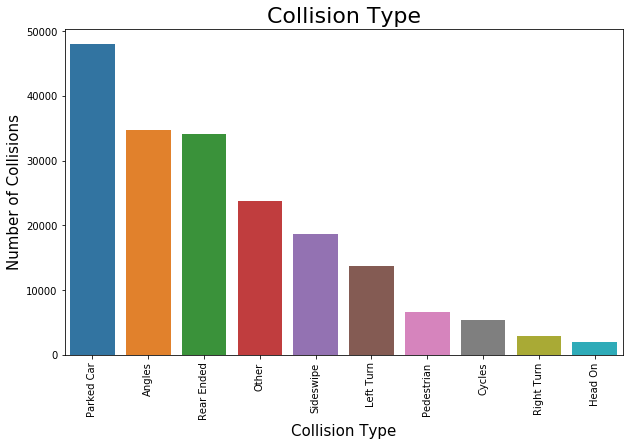

In [15]:
#Collisions by Type
bar_plot(df['COLLISIONTYPE'], 'Collision Type', 'Number of Collisions', 'Collision Type', rotate=90)

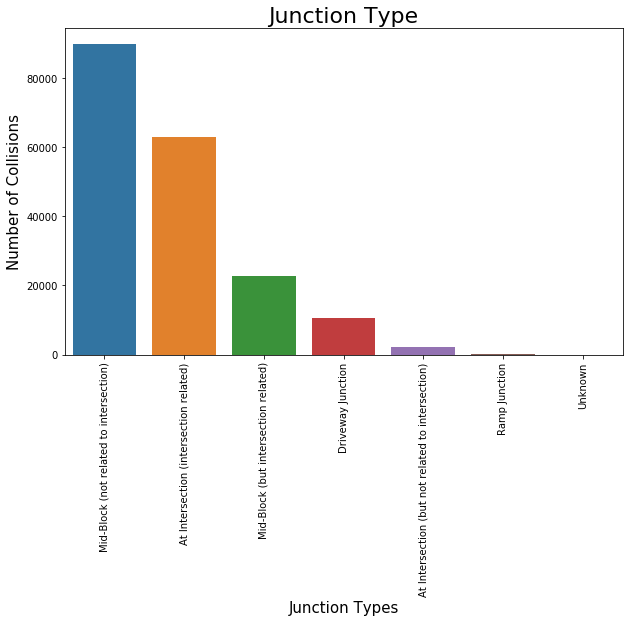

In [16]:

#Collisions by Junction Type
bar_plot(df['JUNCTIONTYPE'], 'Junction Types', 'Number of Collisions', 'Junction Type', rotate=90)

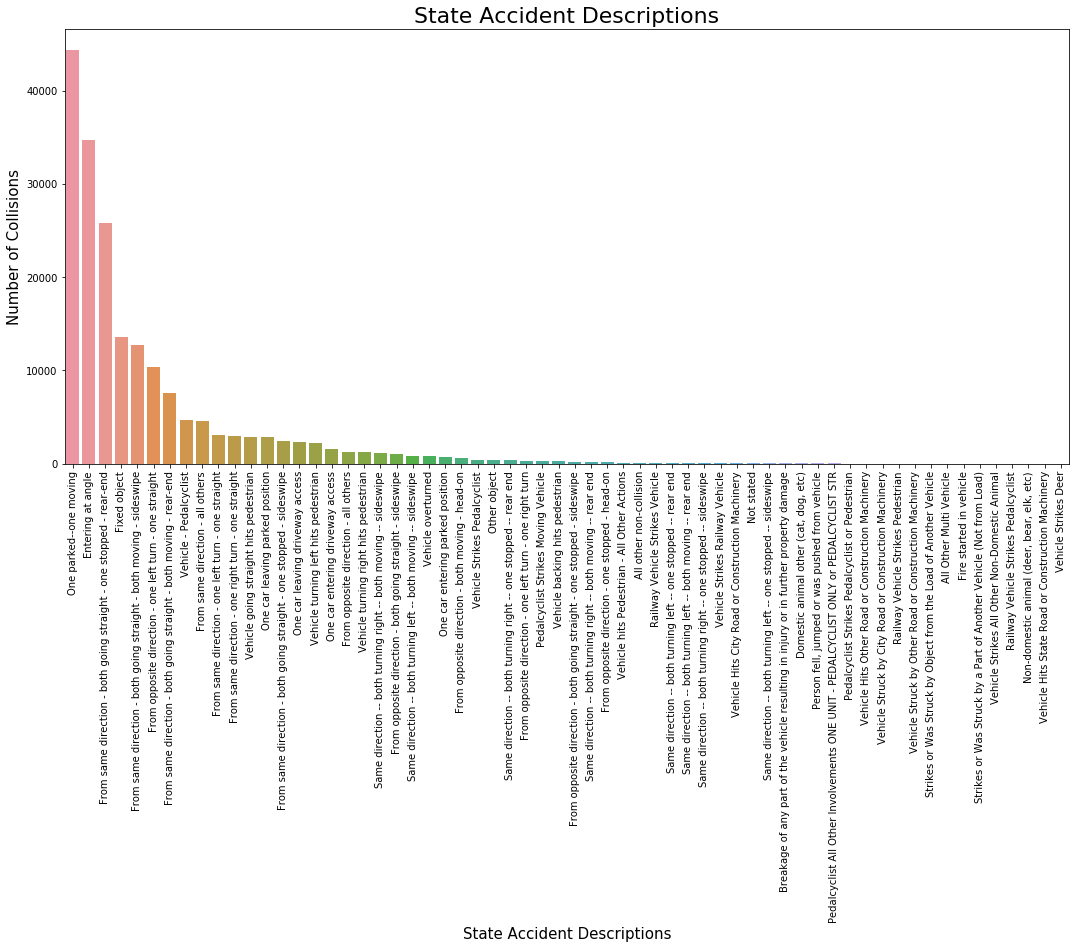

In [17]:
#Accident description 
bar_plot(df['ST_COLDESC'], 'State Accident Descriptions', 'Number of Collisions', 'State Accident Descriptions', size=(18,8), rotate=90)

<B>As we Can see the following concluded <B>:-

    Most accidents involve property rather than injuries.

    Most accidents occure on a block rather than intersection

    Pedestrians are rarely affected by accidents

    Accidents involve 2 vehicles (and 2 people) most of the time (followed by 3 people)

    Highest number of collisions occur with parked cars

    Accidents of property increased in the light than the dark.

    Highest number of accidents mostly occur when: 1 car is moving the other parked, Entering at angle & rear end crashes.

## Selecting Features before Hot Encoding

In [18]:
Features = df['VEHCOUNT']

In [19]:
#Replacing Null values
df['ADDRTYPE'].fillna(df['ADDRTYPE'].mode()[0], inplace=True)
df['ROADCOND'].fillna(df['ROADCOND'].mode()[0], inplace=True)
df['JUNCTIONTYPE'].fillna(df['JUNCTIONTYPE'].mode()[0], inplace=True)

In [20]:
List = ['JUNCTIONTYPE','ADDRTYPE','ROADCOND']

In [21]:
Features = pd.concat([Features,pd.get_dummies(df[List])], axis=1)
Features.head(2)


,VEHCOUNT,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet
0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [22]:
# Defining features and target
X = Features
X[0:5]

,VEHCOUNT,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet
0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,3,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [23]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

In [24]:
# Normalization
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[ 0.12553783, -0.10437651,  1.44892892, -0.2408193 , -0.36412936,
        -0.98767058, -0.02921369, -0.00679952, -0.06223095, -1.39914699,
         1.41129279, -1.4099744 , -0.07905204, -0.01813462, -0.02604842,
        -0.01963186, -0.07200071, -0.02431221, -0.28975087,  1.76085874],
       [ 0.12553783, -0.10437651, -0.69016498, -0.2408193 , -0.36412936,
         1.01248333, -0.02921369, -0.00679952, -0.06223095,  0.71472119,
        -0.70857019, -1.4099744 , -0.07905204, -0.01813462, -0.02604842,
        -0.01963186, -0.07200071, -0.02431221, -0.28975087,  1.76085874],
       [ 1.7102107 , -0.10437651, -0.69016498, -0.2408193 , -0.36412936,
         1.01248333, -0.02921369, -0.00679952, -0.06223095,  0.71472119,
        -0.70857019,  0.70923273, -0.07905204, -0.01813462, -0.02604842,
        -0.01963186, -0.07200071, -0.02431221, -0.28975087, -0.56790473],
       [ 1.7102107 , -0.10437651, -0.69016498, -0.2408193 , -0.36412936,
         1.01248333, -0.02921369, -0.00679952, -

## Modeling with SVM and Logestic Regression

# Decision Tree

In [30]:
from sklearn.svm import SVC 
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 20) (155738,)
Test set: (38935, 20) (38935,)


In [27]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score


depth_range = range(1, 5)
jaccard_similarity_score_ = []
f1_score_ = []

for d in depth_range:
    dt = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dt.fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
    jaccard_similarity_score_.append(jaccard_similarity_score(y_test, dt_yhat))
    f1_score_.append(f1_score(y_test, dt_yhat, average = 'weighted'))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
# MAX DEPTH

result = pd.DataFrame([jaccard_similarity_score_, f1_score_], index = ['Jaccard', 'F1'], columns = ['d = 1','d = 2','d = 3','d = 4'])
result.columns.name = 'Metric'
result

Metric,d = 1,d = 2,d = 3,d = 4
Jaccard,0.704379,0.724284,0.730500,0.730782
F1,0.582206,0.653005,0.665184,0.665548


In [29]:
# Best K 
    
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
dt_model.fit(X_train, y_train)
dt_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Logestic Regression

In [32]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
solvers = ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularization_val = [0.1, 0.01, 0.001]
index = []
accuracy_score = []
iterations = 0

for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
        index.append(index1 + index2 *5)
        iterations +=1
        lr_model = LogisticRegression(C = c, solver = solver)
        lr_model.fit(X_train, y_train)
        lr_yhat = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}'.format(iterations, c, solver, log_loss(y_test, y_prob) ))
        accuracy_score.append(log_loss(y_test, y_prob))
                              
    print('\n')

Test 1: Accuracy at C = 0.1 when Solver = lbfgs is : 0.57179539145878


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test 2: Accuracy at C = 0.1 when Solver = saga is : 0.5718031851489547
Test 3: Accuracy at C = 0.1 when Solver = liblinear is : 0.5717969636742716


/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Test 4: Accuracy at C = 0.1 when Solver = newton-cg is : 0.5717954127921504


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test 5: Accuracy at C = 0.1 when Solver = sag is : 0.5717978828339527


Test 6: Accuracy at C = 0.01 when Solver = lbfgs is : 0.5718112564914934


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test 7: Accuracy at C = 0.01 when Solver = saga is : 0.5718134758702474
Test 8: Accuracy at C = 0.01 when Solver = liblinear is : 0.5718285257296102
Test 9: Accuracy at C = 0.01 when Solver = newton-cg is : 0.5718112509694787


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test 10: Accuracy at C = 0.01 when Solver = sag is : 0.571811567802346


Test 11: Accuracy at C = 0.001 when Solver = lbfgs is : 0.5719191482982486
Test 12: Accuracy at C = 0.001 when Solver = saga is : 0.5719196819133532
Test 13: Accuracy at C = 0.001 when Solver = liblinear is : 0.5722010305466845
Test 14: Accuracy at C = 0.001 when Solver = newton-cg is : 0.5719195405470168
Test 15: Accuracy at C = 0.001 when Solver = sag is : 0.5719196222108631




In [34]:
# Main Model

from sklearn.linear_model import LogisticRegression 

lr_model = LogisticRegression(C = 0.001, solver = 'liblinear')
lr_model.fit(X_train, y_train)
lr_model

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

# Evaluation

In [35]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [36]:
# Dataset Importing
test_df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
print('Dataset Loaded successfully')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dataset Loaded successfully


In [37]:
test_df.head(2)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N


In [38]:
test_df['INCDATE'] = pd.to_datetime(test_df['INCDATE'])
test_df['INCDTTM'] = pd.to_datetime(test_df['INCDTTM'])

test_features = test_df['VEHCOUNT']
test_df['ADDRTYPE'].fillna(test_df['ADDRTYPE'].mode()[0], inplace=True)
test_df['ROADCOND'].fillna(test_df['ROADCOND'].mode()[0], inplace=True)
test_df['JUNCTIONTYPE'].fillna(test_df['JUNCTIONTYPE'].mode()[0], inplace=True)
List_test = ['JUNCTIONTYPE','ADDRTYPE','ROADCOND']

test_features = pd.concat([test_features,pd.get_dummies(test_df[List_test])], axis=1)
test_features.head(2)

# Testing feature
X_loan_test = test_features

# Normalizing Test Data
X_loan_test = preprocessing.StandardScaler().fit(X_loan_test).transform(X_loan_test)

# Target result
y_loan_test = test_df['SEVERITYCODE'].values

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:17: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [39]:
print (X_loan_test[0:5])
print (X_loan_test.shape)

print (y_loan_test[0:5])
print (y_loan_test.shape)

[[ 0.12553783 -0.10437651  1.44892892 -0.2408193  -0.36412936 -0.98767058
  -0.02921369 -0.00679952 -0.06223095 -1.39914699  1.41129279 -1.4099744
  -0.07905204 -0.01813462 -0.02604842 -0.01963186 -0.07200071 -0.02431221
  -0.28975087  1.76085874]
 [ 0.12553783 -0.10437651 -0.69016498 -0.2408193  -0.36412936  1.01248333
  -0.02921369 -0.00679952 -0.06223095  0.71472119 -0.70857019 -1.4099744
  -0.07905204 -0.01813462 -0.02604842 -0.01963186 -0.07200071 -0.02431221
  -0.28975087  1.76085874]
 [ 1.7102107  -0.10437651 -0.69016498 -0.2408193  -0.36412936  1.01248333
  -0.02921369 -0.00679952 -0.06223095  0.71472119 -0.70857019  0.70923273
  -0.07905204 -0.01813462 -0.02604842 -0.01963186 -0.07200071 -0.02431221
  -0.28975087 -0.56790473]
 [ 1.7102107  -0.10437651 -0.69016498 -0.2408193  -0.36412936  1.01248333
  -0.02921369 -0.00679952 -0.06223095  0.71472119 -0.70857019  0.70923273
  -0.07905204 -0.01813462 -0.02604842 -0.01963186 -0.07200071 -0.02431221
  -0.28975087 -0.56790473]
 [ 0.1

In [40]:
# Jaccard
# Decision Tree
dt_yhat = dt_model.predict(X_loan_test)
jss2 = round(jaccard_similarity_score(y_loan_test, dt_yhat), 2)
# Logistic Regression
lr_yhat = lr_model.predict(X_loan_test)
jss4 = round(jaccard_similarity_score(y_loan_test, lr_yhat), 2)
jss_list = [jss2, jss4]
jss_list

[0.73, 0.7]

In [41]:
# F1_score
from sklearn.metrics import f1_score
# Decision Tree
dt_yhat = dt_model.predict(X_loan_test)
f2 = round(f1_score(y_loan_test, dt_yhat, average = 'weighted'), 2)
# Logistic Regression
lr_yhat = lr_model.predict(X_loan_test)
f4 = round(f1_score(y_loan_test, lr_yhat, average = 'weighted'), 2)

f1_list = [f2, f4]
f1_list

[0.66, 0.58]

In [42]:
# log loss
from sklearn.metrics import log_loss

# Logistic Regression
lr_prob = lr_model.predict_proba(X_loan_test)
ll_list = ['NA','NA','NA', round(log_loss(y_loan_test, lr_prob), 2)]
ll_list

['NA', 'NA', 'NA', 0.57]

In [54]:
columns = ['Decision Tree',  'Logistic Regression',"NONE","LR"]
index = ['Jaccard', 'F1-score', 'Logloss']
accuracy_df = pd.DataFrame([jss_list, f1_list, ll_list], index = index, columns = columns)
accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Jaccard,F1-score,Logloss
Decision Tree,0.73,0.66,NA
Logistic Regression,0.7,0.58,NA
NONE,None,None,NA
LR,NaN,NaN,0.57
